# Prisoners Data Visualization

### Step 1: Import the necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the data and display first 5 and last 5 records

In [15]:
df = pd.read_csv('Prisoners-Dataset.csv')
df.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [16]:
df.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


    ### Step 3: Describe the data
   

In [17]:
df.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


### Step 4: Create a column 'total_benefitted' that shows sum of inmates with respect to each State/UT

In [18]:
df.drop('YEAR' , axis=1 , inplace=True)

In [19]:
total_benefitted = df.sum(axis=1)
df['total_benefitted'] = df.sum(axis=1)
df.head()

,STATE/UT,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,9480,13758,672,170,24080
1,Arunachal Pradesh,0,0,0,0,0
2,Assam,676,750,14,30,1470
3,Bihar,1693,3013,125,1417,6248
4,Chhatisgarh,1664,1803,192,103,3762


### Step 5: Create a bar char with total benefitted inmates values in descending order

In [27]:
df = df.set_index('STATE/UT')



In [28]:
total_benefitted = df['total_benefitted']
total_benefitted = total_benefitted.sort_values(ascending=False)

In [29]:
total_benefitted = total_benefitted[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

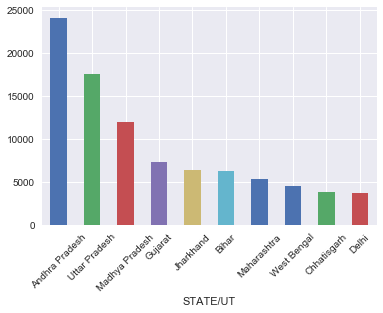

In [30]:
total_benefitted.plot(kind = "bar")
plt.xticks(rotation=45)

In [31]:
sns.set()

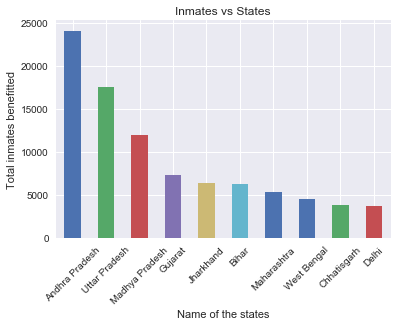

In [32]:
total_benefitted.plot(kind = "bar")
plt.xticks(rotation=45)
plt.xlabel('Name of the states')
plt.ylabel('Total inmates benefitted')
plt.title('Inmates vs States')
plt.savefig('inmates.png')

### Step 6: Create a pie chart to show ratio among different modes of benefits

In [33]:
df.columns

Index(['No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course', 'total_benefitted'],
      dtype='object')

In [35]:
df.columns = ['Elementary' , 'Adult' , 'Higher' , 'Computer' , 'total']             #one more function df.rename


In [39]:
benefits = pd.Series({
    'Elementry': df['Elementary'].sum(axis=0),
    'Adult': df['Adult'].sum(axis=0),
    'Higher': df['Higher'].sum(axis=0),
    'Computer': df['Computer'].sum(axis=0)
})

In [40]:
benefits

Adult        53720
Computer      7356
Elementry    37027
Higher        8311
dtype: int64

([<matplotlib.patches.Wedge at 0x2387beb77f0>,
 [Text(-0.0166589,1.09987,'Adult'),
  Text(-1.06649,-0.269433,'Computer'),
  Text(-0.0143532,-1.09991,'Elementry'),
  Text(1.06705,-0.267196,'Higher')],
 [Text(-0.00908669,0.599931,'50.48'),
  Text(-0.581723,-0.146963,'6.91'),
  Text(-0.00782901,-0.599949,'34.80'),
  Text(0.58203,-0.145743,'7.81')])

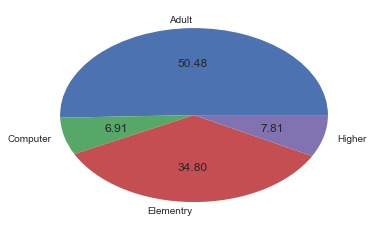

In [41]:
plt.pie(benefits.values , labels=benefits.index , autopct="%.2f")

### Step 7: For the 5 highest benefitted states, create 
1. Bar chart. 
2. Stacked bar chart 
3. 100% stacked chart

In [45]:
highest = df.sort_values('total' , ascending=False).head()

In [47]:
highest.drop('total' , axis=1, inplace=True)

In [ ]:
highest.   